In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet_v2 import ResNet101V2
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from tensorflow.keras import optimizers, losses, activations, models
from tensorflow.keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D,GlobalMaxPooling2D, Concatenate
from tensorflow.keras import applications
import numpy as np
from tensorflow import keras

In [2]:
ROWS=384
COLS=384
train_idg = ImageDataGenerator(vertical_flip=True,
                               horizontal_flip=True,
                               height_shift_range=0.1,
                               width_shift_range=0.1,
                               rescale=1/255)
train_gen = train_idg.flow_from_directory(
    '../input/datatask2/task2/train',
    target_size=(ROWS, COLS),
    batch_size = 64,
    shuffle=True
)
val_datagen = ImageDataGenerator(rescale=1/255)
val_gen = val_datagen.flow_from_directory(
    '../input/datatask2/task2/val',
    target_size=(ROWS, COLS),
    batch_size = 16
)

Found 14465 images belonging to 3 classes.
Found 1808 images belonging to 3 classes.


In [3]:
train_gen.class_indices

{'humanitarian': 0, 'non_informative': 1, 'structure': 2}

In [4]:
class_weights={0:2.0657,1:0.536,2:1.53448}

In [14]:
savemodel = tf.keras.models.load_model('../input/deit-distilled')

In [15]:
savemodel.summary()

Model: "vi_t_distilled"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
projection (Sequential)      (None, 576, 768)          590592    
_________________________________________________________________
transformer_block_0 (Functio [(None, 578, 768), (None, 7087872   
_________________________________________________________________
transformer_block_1 (Functio [(None, 578, 768), (None, 7087872   
_________________________________________________________________
transformer_block_2 (Functio [(None, 578, 768), (None, 7087872   
_________________________________________________________________
transformer_block_3 (Functio [(None, 578, 768), (None, 7087872   
_________________________________________________________________
transformer_block_4 (Functio [(None, 578, 768), (None, 7087872   
_________________________________________________________________
transformer_block_5 (Functio [(None, 578, 768), (Non

In [18]:
savemodel.trainable=False

In [28]:
image=Input((384,384,3))
out,_=savemodel(image)
out=Dense(512,activation='relu')(out)
out=Dropout(0.3)(out)
o=Dense(3,activation='softmax')(out)
model=Model(inputs=image,outputs=o)

In [29]:
metrics = METRICS = [
    tf.keras.metrics.CategoricalAccuracy(name="accuracy"),
    tf.keras.metrics.Precision(name="precison"),
    tf.keras.metrics.Recall(name="recall")
]
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), 
              optimizer=tf.keras.optimizers.Adam(),
              metrics=metrics)
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 384, 384, 3)]     0         
_________________________________________________________________
vi_t_distilled (ViTDistilled ((None, 768), {'transform 86092032  
_________________________________________________________________
dense_15 (Dense)             (None, 512)               393728    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 3)                 1539      
Total params: 86,487,299
Trainable params: 395,267
Non-trainable params: 86,092,032
_________________________________________________________________


In [30]:
from tensorflow import keras
file_path="weights.best.hdf5"

es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8)
mc = keras.callbacks.ModelCheckpoint('best_model_alt-loss-vit', monitor='loss', mode='min', save_best_only=True)
ms = keras.callbacks.ModelCheckpoint('best_model_alt-valloss-vit', monitor='val_loss', mode='min', save_best_only=True)

callbacks_list = [es, mc,ms] #early


history = model.fit(train_gen,
                              validation_data=val_gen, 
                              epochs=100, 
                              shuffle=True, 
                              verbose=True,
                                class_weight=class_weights,
                              callbacks=callbacks_list)

Epoch 1/100
227/227 [==============================] - 757s 3s/step - loss: 0.6129 - accuracy: 0.7551 - precison: 0.7746 - recall: 0.7289 - val_loss: 0.5172 - val_accuracy: 0.7871 - val_precison: 0.8047 - val_recall: 0.7633


2022-05-17 14:43:27.742584: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/100
227/227 [==============================] - 732s 3s/step - loss: 0.5095 - accuracy: 0.7933 - precison: 0.8119 - recall: 0.7694 - val_loss: 0.4338 - val_accuracy: 0.8241 - val_precison: 0.8389 - val_recall: 0.8092


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 3/100
227/227 [==============================] - 736s 3s/step - loss: 0.4668 - accuracy: 0.8058 - precison: 0.8220 - recall: 0.7879 - val_loss: 0.4122 - val_accuracy: 0.8429 - val_precison: 0.8547 - val_recall: 0.8263


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 4/100
227/227 [==============================] - 735s 3s/step - loss: 0.4439 - accuracy: 0.8127 - precison: 0.8278 - recall: 0.7934 - val_loss: 0.4067 - val_accuracy: 0.8429 - val_precison: 0.8571 - val_recall: 0.8263


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 5/100
227/227 [==============================] - 733s 3s/step - loss: 0.4260 - accuracy: 0.8225 - precison: 0.8363 - recall: 0.8061 - val_loss: 0.4345 - val_accuracy: 0.8385 - val_precison: 0.8473 - val_recall: 0.8225


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 6/100
227/227 [==============================] - 728s 3s/step - loss: 0.4014 - accuracy: 0.8337 - precison: 0.8477 - recall: 0.8198 - val_loss: 0.4369 - val_accuracy: 0.8352 - val_precison: 0.8472 - val_recall: 0.8219


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 7/100
227/227 [==============================] - 729s 3s/step - loss: 0.3857 - accuracy: 0.8359 - precison: 0.8479 - recall: 0.8218 - val_loss: 0.4495 - val_accuracy: 0.8313 - val_precison: 0.8424 - val_recall: 0.8191


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 8/100
227/227 [==============================] - 730s 3s/step - loss: 0.3747 - accuracy: 0.8462 - precison: 0.8573 - recall: 0.8321 - val_loss: 0.4421 - val_accuracy: 0.8363 - val_precison: 0.8465 - val_recall: 0.8269


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 9/100
227/227 [==============================] - 734s 3s/step - loss: 0.3609 - accuracy: 0.8491 - precison: 0.8599 - recall: 0.8356 - val_loss: 0.4395 - val_accuracy: 0.8457 - val_precison: 0.8525 - val_recall: 0.8346


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 10/100
227/227 [==============================] - 725s 3s/step - loss: 0.3438 - accuracy: 0.8579 - precison: 0.8689 - recall: 0.8474 - val_loss: 0.4482 - val_accuracy: 0.8407 - val_precison: 0.8515 - val_recall: 0.8341


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 11/100
227/227 [==============================] - 726s 3s/step - loss: 0.3361 - accuracy: 0.8594 - precison: 0.8682 - recall: 0.8494 - val_loss: 0.4292 - val_accuracy: 0.8457 - val_precison: 0.8543 - val_recall: 0.8402


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 12/100
227/227 [==============================] - 725s 3s/step - loss: 0.3166 - accuracy: 0.8688 - precison: 0.8782 - recall: 0.8586 - val_loss: 0.4799 - val_accuracy: 0.8313 - val_precison: 0.8381 - val_recall: 0.8247
Epoch 00012: early stopping


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [32]:
savemodel = tf.keras.models.load_model('best_model_alt-valloss-vit')

In [34]:
import os
predicted=[]
real=[]
for dir in os.listdir("../input/datatask2/task2/test"):
    if dir=='humanitarian':
        r=0
    elif dir =='non_informative':
        r=1
    else:
        r=2
    for path in os.listdir(f'../input/datatask2/task2/test/{dir}'):
        p=f'../input/datatask2/task2/test/{dir}/{path}'
        img = tf.keras.utils.load_img(
    p, target_size=(384, 384)
)
        img_array = tf.keras.utils.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0) # Create a batch
        img_array=preprocess_input(img_array)

        predictions = model.predict(img_array)
        real.append(r)
        predicted.append(np.argmax(predictions))

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:946: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [35]:
from sklearn import metrics
print(metrics.classification_report(real,predicted))
print(metrics.confusion_matrix(real,predicted))

              precision    recall  f1-score   support

           0       0.64      0.75      0.69       284
           1       0.92      0.88      0.90      1131
           2       0.83      0.83      0.83       394

    accuracy                           0.85      1809
   macro avg       0.80      0.82      0.81      1809
weighted avg       0.86      0.85      0.85      1809

[[214  53  17]
 [ 85 998  48]
 [ 33  33 328]]


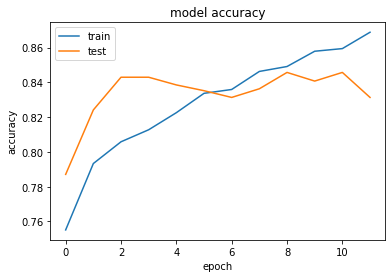

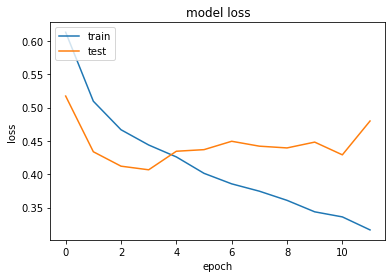

In [36]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
import seaborn as sebrn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as atlas

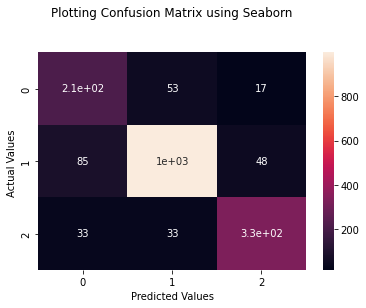

In [40]:
conf_matrix = (confusion_matrix(real, predicted))

# Using Seaborn heatmap to create the plot
fx = sebrn.heatmap(conf_matrix, annot=True)

# labels the title and x, y axis of plot
fx.set_title('Plotting Confusion Matrix using Seaborn\n\n');
fx.set_xlabel('Predicted Values')
fx.set_ylabel('Actual Values ');

# labels the boxes
